# Multi-Layer Perceptron

In this lab you will explore how to create and fit multi-layer perceptron (MLP) models to data.

In [2]:
import sklearn
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

from sklearn.neural_network import MLPClassifier


First we create a toy dataset using the `make_moons` function.

In [3]:
x,y = make_moons()

The data consists of 2D points and binary labels (0 or 1).

In [4]:
x[:5]

array([[ 0.51839257,  0.85514276],
       [ 1.98155916,  0.30884137],
       [ 0.76144596,  0.6482284 ],
       [ 1.51839257, -0.35514276],
       [-0.46253829,  0.88659931]])

In [5]:
y[:5]

array([0, 1, 0, 1, 0])

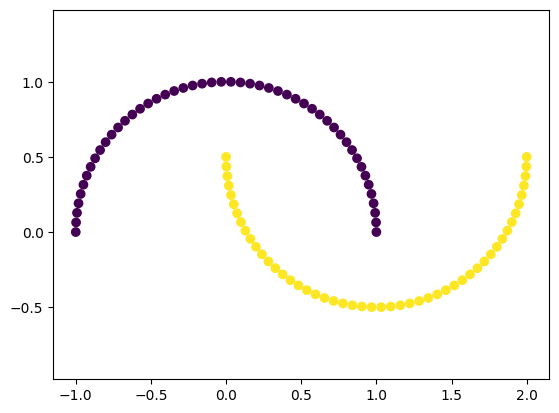

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.axis('equal')
plt.show()

First we will fit a linear classifier to this data, using the `LogisticRegression` class.

*(Even though it is called "regression," this model is for classification problems.)*

In [7]:
LR = LogisticRegression(penalty=None).fit(x,y)

The `predict` function predicts labels for input data. 

In [8]:
ypred = LR.predict(x)

In [9]:
ypred[:5]

array([0, 1, 0, 1, 0])

The `plot_decision_regions` function from `mlxtend` illustrates how a classification model divides the descriptor space into classes.

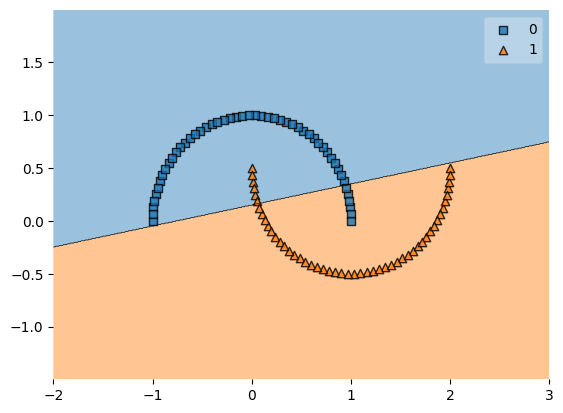

In [10]:
plot_decision_regions(x, y, clf=LR)
plt.show()

Clearly the linear model is unable to separate the moons dataset.

## Exercises

Now it's your turn -- try a MLP on this dataset!

1. Create an `MLPClassifier` and fit it to the moons dataset.  Leave the parameters at the default settings.

Calculate the accuracy on the training set and plot the decision regions.  

In [14]:
classifier = MLPClassifier().fit(x,y)
classifier.score(x,y)

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.87

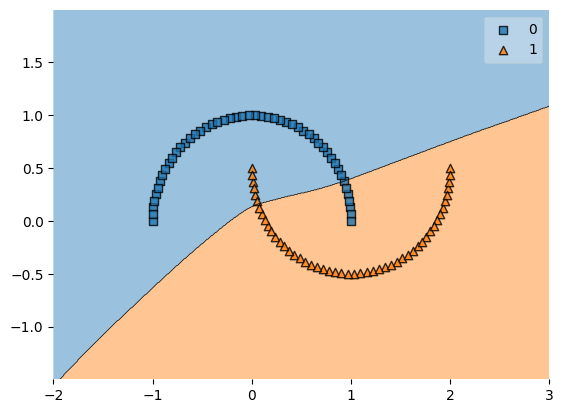

In [15]:
plot_decision_regions(x, y, clf=classifier)
plt.show()

2. Change the parameters of the model until you can reach 100% accuracy.

Here are some ideas: increase the hidden layer size and and add more hidden layers; increase the number of iterations; reduce the regularization strength (```alpha```).

In [19]:
classifier = MLPClassifier(hidden_layer_sizes=(50,50,50)).fit(x,y)
classifier.score(x,y)

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

Here I make some random data with three classes.

In [20]:
x = np.random.random(size=(100,2))
y = np.random.randint(3,size=(100))

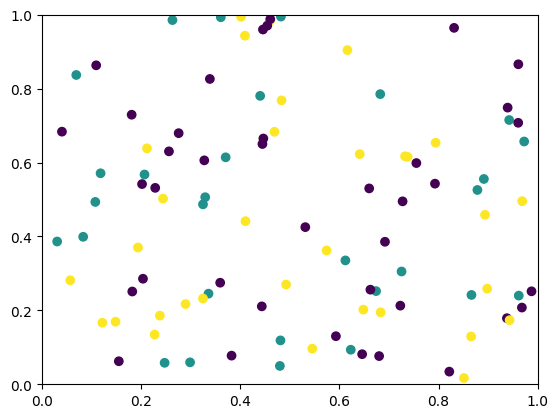

In [21]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

3. Plot the decision regions for the MLP with an increasing number of layers to show the effect of choosing a larger model versus a smaller model.

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


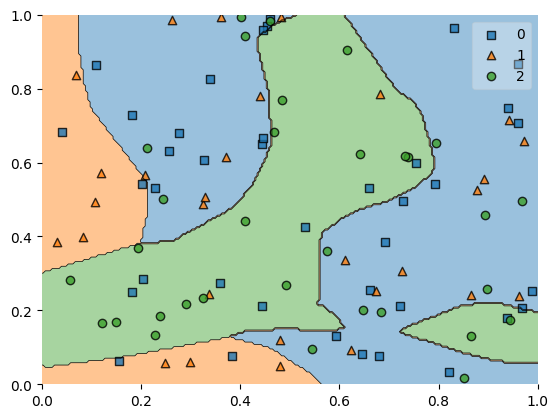

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


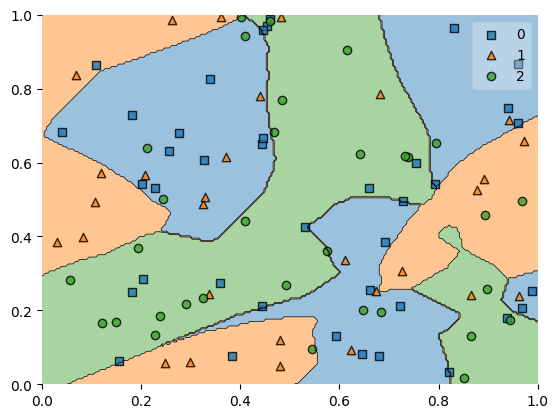

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


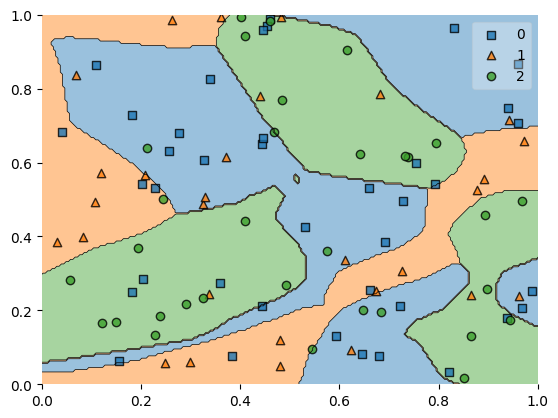

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


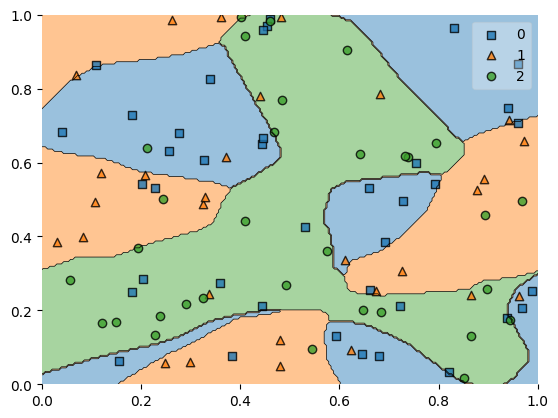

In [22]:
for i in range (1,5):
    classifier = MLPClassifier(hidden_layer_sizes=(i*50, i*50, i*50)).fit(x,y)
    plot_decision_regions(x,y,clf=classifier)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

4. This time, use an MLP with three layers and 200 neurons per layer. Plot the decision regions as you increase regularization strength.

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


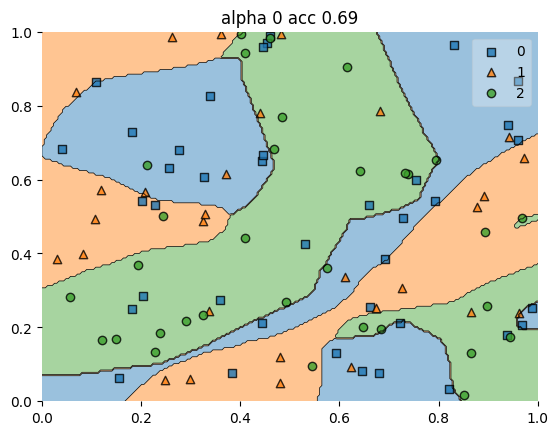

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


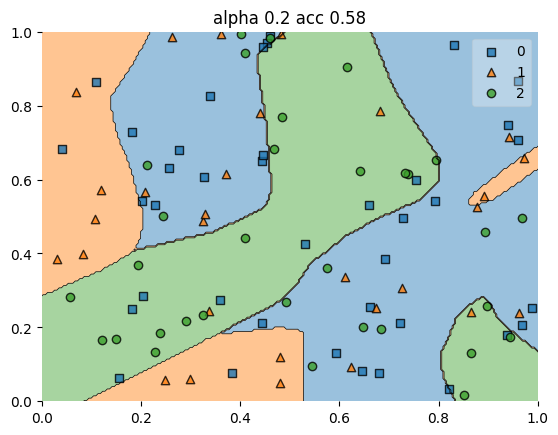

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


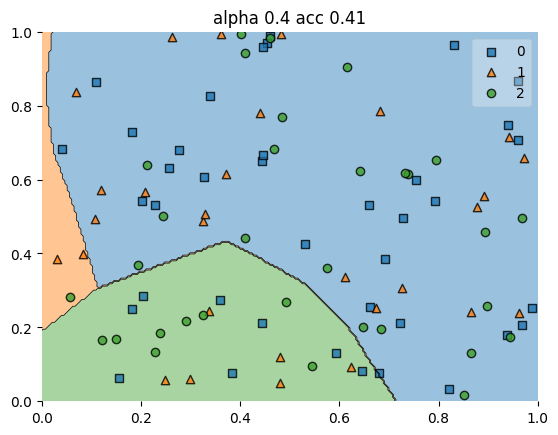

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


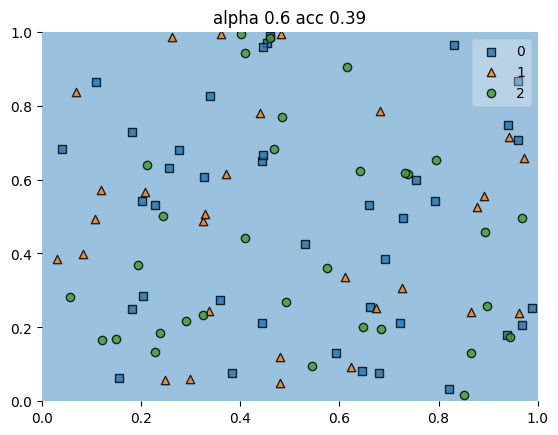

/home/wyattcolburn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


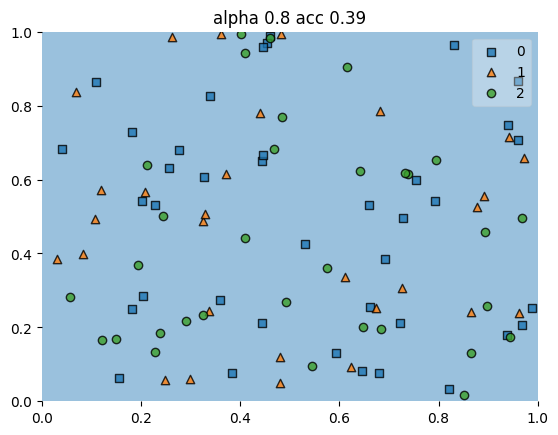

In [26]:
alpha = [0, .2, .4, .6, .8, .95]
for i in range(0,5):
    
    classifier = MLPClassifier(hidden_layer_sizes=[200,200,200], alpha = alpha[i]).fit(x,y)
    acc= classifier.score(x,y)

    plot_decision_regions(x,y,clf=classifier)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(f'alpha {alpha[i]} acc {acc}')
    plt.show()